In [1]:
'''
Name : Peter Sunny Shanthveer Markappa
Student Number: R00208303
Assignemnt : 01
Subject: Deep Learning
Submission Date: 03- April - 2022
'''
# drop out

'\nName : Peter Sunny Shanthveer Markappa\nStudent Number: R00208303\nAssignemnt : 01\nSubject: Deep Learning\nSubmission Date: 03- April - 2022\n'

In [ ]:
import tensorflow as tf
print(tf.__version__)

from keras.utils import np_utils
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
import tensorflow as tf
from numpy import exp
import numpy as np


2.8.0


In [ ]:
def softmax(vector):
    e = tf.exp(vector, name='exp')
    return e / tf.math.reduce_sum(e, keepdims=1, name=None, axis=0)

In [ ]:
def calculate_accuracy(y_pred, tr_y):

    predictions_y_pred = tf.argmax(y_pred, axis=0)
    # print("predictions_y_pred", predictions_y_pred)
    
    predictions_tr_y = tf.argmax(tr_y, axis=0)
    # print("predictions_tr_y", predictions_tr_y)

    predictions_correct = tf.cast(tf.equal(tf.transpose(predictions_y_pred), predictions_tr_y), tf.dtypes.float64)
    
    # # Finally, we just determine the mean value of predictions_correct
    accuracy = tf.reduce_mean(predictions_correct)
    
    return accuracy

In [ ]:
def cross_entropy(tr_y, y_pred):
    return (-1/tr_y.shape[0]) * (tf.math.reduce_sum(tr_y * tf.math.log(y_pred) + (1 - tr_y) * (tf.math.log(1 - y_pred))))


In [ ]:
def forward_pass(x, w1, b1, w2, b2, w3, b3, condition):
    # We need to mutliply each training example by the weights and add bias
    y_pred = tf.matmul(x, tf.transpose(w1)) + b1

    relu_res = tf.keras.activations.relu(y_pred)

    # --------- Drop out layer starts ----------
    if condition==0:
      probThreshold = 1 - 0.5
      neuronsize = relu_res.shape[0]
      trainingsize = relu_res.shape[1]

      dropmatrix = tf.cast(tf.Variable(tf.random.uniform([neuronsize, trainingsize], dtype=tf.dtypes.float64)) < probThreshold, tf.float64)
      relu_res = relu_res * dropmatrix
    # --------- Drop out layer ends -------------


    y_pred1 = tf.matmul(relu_res, tf.transpose(w2)) + b2
    relu_res1 = tf.keras.activations.relu(y_pred1)


    y_pred2 = tf.matmul(relu_res1,tf.transpose(w3)) + b3
    act = softmax(y_pred2)
    # act = tf.keras.activations.softmax(y_pred1)
    
    return act

In [ ]:
def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T
#     print ("Shape of training labels after transpose ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
#     print ("Shape of testing labels after transpose ", te_y.shape)
    
    
      # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    
    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#     cross_entropy = tf.keras.losses.categorical_crossentropy()
    
    
    #  X_digits, y_digits = loadData()    
    tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)
    
    # We need a coefficient for each of the features and a single bias value
    # we create a column vector of weights all initialized to small random values

    w1 = tf.Variable(tf.random.normal( [300, 784] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([300], dtype=tf.dtypes.float64))   

    w2 = tf.Variable(tf.random.normal([100, 300] , mean=0.1, stddev=0.08,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([100], dtype=tf.dtypes.float64))

    w3 = tf.Variable(tf.random.normal([10, 100] , mean=0.2, stddev=0.03,dtype=tf.dtypes.float64))
    b3 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))



    # Splitting the Training data into two parts
    # 1) traning 2) Validation

    tr_x_Training = tr_x[ : 48000, :]
    tr_x_Validation = tr_x[ 48000:, :]

    tr_y_Training = tr_y[ : , : 48000]
    tr_y_Validation = tr_y[ : , 48000 :]



    # Iterate our training loop
    for i in range(100):
        
        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c
        
        with tf.GradientTape() as tape:

            # Training
            y_pred_training = forward_pass(tr_x_Training, w1, b1, w2, b2, w3, b3, 0)

            # print("before cross entropy tr_y_Training",tr_y_Training.shape )
            # print("before cross entropy y_pred_training",y_pred_training.shape )

            training_Loss = cross_entropy(tf.transpose(tr_y_Training), y_pred_training)
            trainingLoss.append(training_Loss)
        
        gradients = tape.gradient(training_Loss, [w1, b1, w2, b2, w3, b3])

        training_accuracy = calculate_accuracy(tf.transpose(y_pred_training), tr_y_Training)
        trainingAccuracies.append(training_accuracy)
        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2, w3, b3]))
        

        # # Validation
        y_pred_validation = forward_pass(tr_x_Validation, w1, b1, w2, b2, w3, b3, 1)
        validation_Loss = cross_entropy(tf.transpose(tr_y_Validation), y_pred_validation)
        validation_accuracy = calculate_accuracy(tf.transpose(y_pred_validation), tr_y_Validation)
        validationLoss.append(validation_Loss)    
        validationAccuracies.append(validation_accuracy)

        if i % 50 == 0:
          print ("Iteration ", i, "\n")
          print(": Training Loss = ",training_Loss.numpy(), ": Validation Loss = ",validation_Loss.numpy())
          print( "Training Accuracies: ", training_accuracy.numpy(), "Validation Accuracies: ", validation_accuracy.numpy())
          print ("----------------")



    # Test Data
    y_pred = forward_pass(te_x, w1, b1, w2, b2, w3, b3, 1)
    currentLoss = cross_entropy(tf.transpose(te_y), y_pred)
    test_accuracy = calculate_accuracy(tf.transpose(y_pred), te_y) 
    print ("Test Accuracy : ", test_accuracy)


    plt.plot(trainingLoss, label="Train Loss")        
    plt.plot(validationLoss, label="Val Loss")
    plt.legend()
    plt.show()

    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.legend()
    plt.show()



4431872/4422102 [==============================] - 0s 0us/step
Iteration  0 

: Training Loss =  84.84036095764985 : Validation Loss =  88.3710310311645
Training Accuracies:  0.10327083333333334 Validation Accuracies:  0.107
----------------
Iteration  50 

: Training Loss =  38.02659073130758 : Validation Loss =  26.113306655443264
Training Accuracies:  0.10385416666666666 Validation Accuracies:  0.10716666666666666
----------------
Test Accuracy :  tf.Tensor(0.1095, shape=(), dtype=float64)


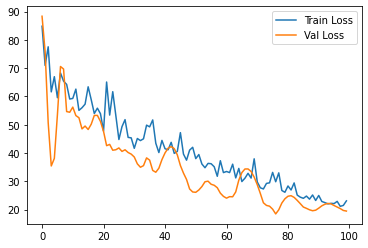

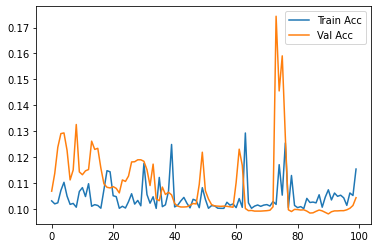

In [ ]:
main()

In [ ]:
# 1000 Iteration

In [ ]:
def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T
#     print ("Shape of training labels after transpose ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
#     print ("Shape of testing labels after transpose ", te_y.shape)
    
    
      # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    
    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#     cross_entropy = tf.keras.losses.categorical_crossentropy()
    
    
    #  X_digits, y_digits = loadData()    
    tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)
    
    # We need a coefficient for each of the features and a single bias value
    # Notice we create a column vector of weights all initialized to small random values

    w1 = tf.Variable(tf.random.normal( [300, 784] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([300], dtype=tf.dtypes.float64))   

    w2 = tf.Variable(tf.random.normal([100, 300] , mean=0.1, stddev=0.08,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([100], dtype=tf.dtypes.float64))

    w3 = tf.Variable(tf.random.normal([10, 100] , mean=0.2, stddev=0.03,dtype=tf.dtypes.float64))
    b3 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))



    # Splitting the Training data into two parts
    # 1) traning 2) Validation

    tr_x_Training = tr_x[ : 48000, :]
    tr_x_Validation = tr_x[ 48000:, :]

    tr_y_Training = tr_y[ : , : 48000]
    tr_y_Validation = tr_y[ : , 48000 :]



    # Iterate our training loop
    for i in range(1000):
        
        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c
        
        with tf.GradientTape() as tape:

            # Training
            y_pred_training = forward_pass(tr_x_Training, w1, b1, w2, b2, w3, b3, 0)

            # print("before cross entropy tr_y_Training",tr_y_Training.shape )
            # print("before cross entropy y_pred_training",y_pred_training.shape )

            training_Loss = cross_entropy(tf.transpose(tr_y_Training), y_pred_training)
            trainingLoss.append(training_Loss)
        
        gradients = tape.gradient(training_Loss, [w1, b1, w2, b2, w3, b3])

        training_accuracy = calculate_accuracy(tf.transpose(y_pred_training), tr_y_Training)
        trainingAccuracies.append(training_accuracy)
        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2, w3, b3]))
        

        # # Validation
        y_pred_validation = forward_pass(tr_x_Validation, w1, b1, w2, b2, w3, b3, 1)
        validation_Loss = cross_entropy(tf.transpose(tr_y_Validation), y_pred_validation)
        validation_accuracy = calculate_accuracy(tf.transpose(y_pred_validation), tr_y_Validation)
        validationLoss.append(validation_Loss)    
        validationAccuracies.append(validation_accuracy)

        if i % 50 == 0:
          print ("Iteration ", i, "\n")
          print(": Training Loss = ",training_Loss.numpy(), ": Validation Loss = ",validation_Loss.numpy())
          print( "Training Accuracies: ", training_accuracy.numpy(), "Validation Accuracies: ", validation_accuracy.numpy())
          print ("----------------")



    # Test Data
    y_pred = forward_pass(te_x, w1, b1, w2, b2, w3, b3, 1)
    currentLoss = cross_entropy(tf.transpose(te_y), y_pred)
    test_accuracy = calculate_accuracy(tf.transpose(y_pred), te_y) 
    print ("Test Accuracy : ", test_accuracy)


    plt.plot(trainingLoss, label="Train Loss")        
    plt.plot(validationLoss, label="Val Loss")
    plt.legend()
    plt.show()

    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.legend()
    plt.show()



4431872/4422102 [==============================] - 0s 0us/step
Iteration  0 

: Training Loss =  94.61141020773081 : Validation Loss =  110.75867046486977
Training Accuracies:  0.10541666666666667 Validation Accuracies:  0.154
----------------
Iteration  50 

: Training Loss =  38.03824863622724 : Validation Loss =  36.45646201781917
Training Accuracies:  0.11335416666666667 Validation Accuracies:  0.13558333333333333
----------------
Iteration  100 

: Training Loss =  21.37897963705209 : Validation Loss =  15.489818987125016
Training Accuracies:  0.11564583333333334 Validation Accuracies:  0.207
----------------
Iteration  150 

: Training Loss =  14.465805851941074 : Validation Loss =  11.795306334446387
Training Accuracies:  0.1569375 Validation Accuracies:  0.2505833333333333
----------------
Iteration  200 

: Training Loss =  12.145137603511634 : Validation Loss =  10.59713348715583
Training Accuracies:  0.22072916666666667 Validation Accuracies:  0.3263333333333333
------------

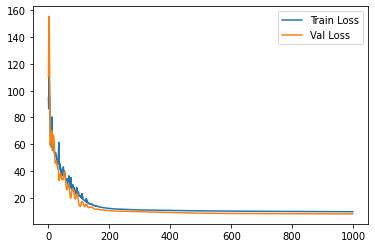

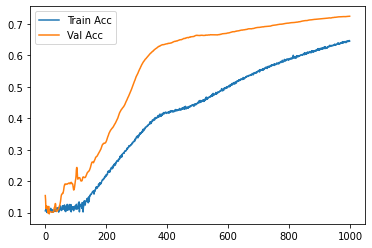

In [ ]:
main()

By changing the weights and percentage of training and validation data

4431872/4422102 [==============================] - 0s 0us/step
Iteration  0 

: Training Loss =  105.78033380338374 : Validation Loss =  124.03234423765882
Training Accuracies:  0.08488095238095238 Validation Accuracies:  0.10144444444444445
----------------
Iteration  100 

: Training Loss =  18.860341046079938 : Validation Loss =  19.412248254676047
Training Accuracies:  0.10602380952380952 Validation Accuracies:  0.09605555555555556
----------------
Iteration  200 

: Training Loss =  11.5341353605216 : Validation Loss =  11.271297504410436
Training Accuracies:  0.2337857142857143 Validation Accuracies:  0.3412222222222222
----------------
Iteration  300 

: Training Loss =  10.717646981677127 : Validation Loss =  10.0250523920993
Training Accuracies:  0.36078571428571427 Validation Accuracies:  0.5256111111111111
----------------
Iteration  400 

: Training Loss =  10.429014405223073 : Validation Loss =  9.409052423996231
Training Accuracies:  0.4438095238095238 Validation Accuraci

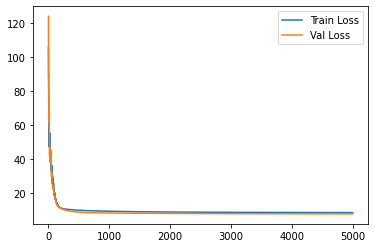

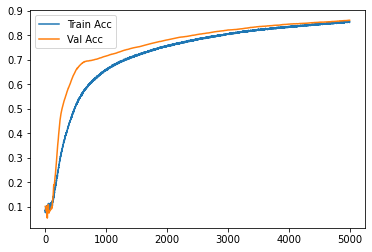

In [ ]:
def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T
#     print ("Shape of training labels after transpose ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
#     print ("Shape of testing labels after transpose ", te_y.shape)
    
    
      # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    
    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#     cross_entropy = tf.keras.losses.categorical_crossentropy()
    
    
    #  X_digits, y_digits = loadData()    
    tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)
    
    # We need a coefficient for each of the features and a single bias value
    # Notice we create a column vector of weights all initialized to small random values

    w1 = tf.Variable(tf.random.normal( [300, 784] , mean=0.0, stddev=0.06,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([300], dtype=tf.dtypes.float64))   

    w2 = tf.Variable(tf.random.normal([100, 300] , mean=0.1, stddev=0.09,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([100], dtype=tf.dtypes.float64))

    w3 = tf.Variable(tf.random.normal([10, 100] , mean=0.2, stddev=0.05,dtype=tf.dtypes.float64))
    b3 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))



    # Splitting the Training data into two parts
    # 1) traning 2) Validation

    tr_x_Training = tr_x[ : 42000, :]
    tr_x_Validation = tr_x[ 42000:, :]

    tr_y_Training = tr_y[ : , : 42000]
    tr_y_Validation = tr_y[ : , 42000 :]



    # Iterate our training loop
    for i in range(5000):
        
        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c
        
        with tf.GradientTape() as tape:

            # Training
            y_pred_training = forward_pass(tr_x_Training, w1, b1, w2, b2, w3, b3, 0)

            # print("before cross entropy tr_y_Training",tr_y_Training.shape )
            # print("before cross entropy y_pred_training",y_pred_training.shape )

            training_Loss = cross_entropy(tf.transpose(tr_y_Training), y_pred_training)
            trainingLoss.append(training_Loss)
        
        gradients = tape.gradient(training_Loss, [w1, b1, w2, b2, w3, b3])

        training_accuracy = calculate_accuracy(tf.transpose(y_pred_training), tr_y_Training)
        trainingAccuracies.append(training_accuracy)
        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2, w3, b3]))
        

        # # Validation
        y_pred_validation = forward_pass(tr_x_Validation, w1, b1, w2, b2, w3, b3, 1)
        validation_Loss = cross_entropy(tf.transpose(tr_y_Validation), y_pred_validation)
        validation_accuracy = calculate_accuracy(tf.transpose(y_pred_validation), tr_y_Validation)
        validationLoss.append(validation_Loss)    
        validationAccuracies.append(validation_accuracy)

        if i % 100 == 0:
          print ("Iteration ", i, "\n")
          print(": Training Loss = ",training_Loss.numpy(), ": Validation Loss = ",validation_Loss.numpy())
          print( "Training Accuracies: ", training_accuracy.numpy(), "Validation Accuracies: ", validation_accuracy.numpy())
          print ("----------------")



    # Test Data
    y_pred = forward_pass(te_x, w1, b1, w2, b2, w3, b3, 1)
    currentLoss = cross_entropy(tf.transpose(te_y), y_pred)
    test_accuracy = calculate_accuracy(tf.transpose(y_pred), te_y) 
    print ("Test Accuracy : ", test_accuracy)


    plt.plot(trainingLoss, label="Train Loss")        
    plt.plot(validationLoss, label="Val Loss")
    plt.legend()
    plt.show()

    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.legend()
    plt.show()

main()